# Importation

In [4]:
from sklearn.datasets import load_digits
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# load the dataset and preprocessing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#load digits
digits = load_digits()

#create the variables
images = digits['images']
images= images.reshape(-1, 64)
targets = digits['target']

#print shape 
print(images.shape)
print(targets.shape)

#standardscaler
scaler =StandardScaler()
scaler.fit_transform(images)

#train test split
img_train , img_test, targets_train, targets_test = train_test_split(images, targets, test_size=.2)
print(img_train.shape, img_test.shape)
print(targets.shape, targets_test.shape)

(1797, 64)
(1797,)
(1437, 64) (360, 64)
(1797,) (360,)


# Modeling

In [6]:
#flatten
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[8,8]))

#create the layers
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
prediction = model(img_train[0:1])
print(prediction , targets_train[0:1])

tf.Tensor(
[[2.5608810e-04 3.1333162e-05 4.5964363e-05 1.1433738e-06 9.9816197e-01
  3.2493813e-06 4.1816098e-04 9.3192142e-04 6.6449784e-06 1.4352190e-04]], shape=(1, 10), dtype=float32) [2]


# the summary of model

In [8]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 50,826
Trainable params: 50,826
Non-trainable params: 0
_________________________________________________________________
None


# compile the model

In [9]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

# fit the model

In [10]:
history = model.fit(img_train, targets_train, epochs=50, validation_split=.2)

Epoch 1/50


2021-09-05 12:11:44.185137: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


36/36 [==============================] - 1s 9ms/step - loss: 1.3024 - accuracy: 0.6919 - val_loss: 0.3603 - val_accuracy: 0.9132
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.9225 - val_loss: 0.2324 - val_accuracy: 0.9271
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9556 - val_loss: 0.1923 - val_accuracy: 0.9514
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9756 - val_loss: 0.1901 - val_accuracy: 0.9340
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9843 - val_loss: 0.1621 - val_accuracy: 0.9514
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9878 - val_loss: 0.1726 - val_accuracy: 0.9306
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9904 - val_loss: 0.1661 - val_accuracy: 0.9514
Epoch 8/50
36/36 [=============

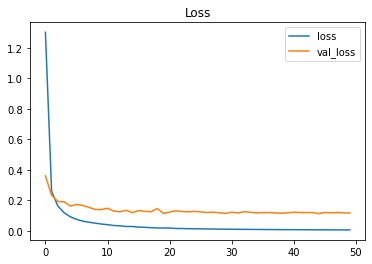

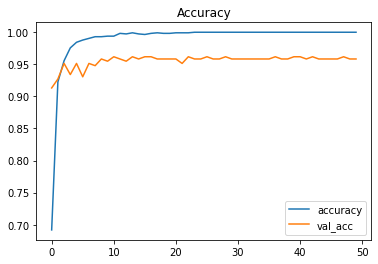

In [11]:
#loss
loss = history.history['loss']
loss_val = history.history['val_loss']

#accuracy
accuracy = history.history['accuracy']
acc_val = history.history['val_accuracy']

#visulalization
plt.figure()
plt.plot(loss, label = 'loss')
plt.plot(loss_val, label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(accuracy, label = 'accuracy')
plt.plot(acc_val , label = 'val_acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [13]:
output = model(img_test[0:1])
print('prediction: ',output, '\n targets:',targets_test[0:1])

prediction:  tf.Tensor(
[[2.1150508e-05 1.5632142e-05 2.4030991e-04 4.3662635e-04 4.4110628e-05
  1.6021951e-03 1.0464491e-05 2.1404916e-04 9.9163967e-01 5.7758950e-03]], shape=(1, 10), dtype=float32) 
 targets: [8]
